In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import sys
sys.path.append('../')
import pathlib
directory_path = str(pathlib.Path('__notebook__').parent.resolve())


from tabularmagic.api import TabularMagic
from tabularmagic.api.mlR import (LinearR, RobustLinearR, 
    SVMR, MLPR, TreeEnsembleR, KBestSelectorR)
from tabularmagic.api.mlC import LinearC



df_train = pd.read_csv(f'{directory_path}/house_price_data/train.csv', index_col='Id')

display(df_train.head())
print('df shape:', df_train.shape)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


df shape: (1460, 80)


In [2]:
tm = TabularMagic(df_train, test_size=0.3, name='Housing sale price data')
tm

INFO: Initialization complete. Shapes of train, test datasets: (1022, 80), (438, 
      80). 


Housing sale price data 
--------------------------------------------------------------------------------
Train shape: (1022, 80)                  Test shape: (438, 80)                  
--------------------------------------------------------------------------------
Categorical variables:
  MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, 
  LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, 
  RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, 
  ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, 
  BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, 
  Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, 
  PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition 
                                                                                
Continuous variables:
  MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, 
  YearRemodAdd, Mas

In [3]:
tm.eda('all').categorical_summary_statistics()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Statistic,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
n_unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,3,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
most_common,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
least_common,C (all),Grvl,Pave,IR3,Low,NoSeWa,FR3,Sev,Blueste,RRNe,RRAe,2fmCon,2.5Fin,Shed,Metal,CBlock,Other,BrkCmn,Fa,Po,Wood,Fa,Po,Mn,LwQ,GLQ,Floor,Po,N,Mix,Fa,Sev,Po,2Types,Fin,Ex,Ex,P,Ex,MnWw,TenC,Con,AdjLand
n_missing,0,0,1369,0,0,0,0,0,0,0,0,0,0,0,0,0,0,872,0,0,0,37,37,38,37,38,0,0,0,1,0,0,690,81,81,81,81,0,1453,1179,1406,0,0
missing_rate,0.0,0.0,0.937671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.59726,0.0,0.0,0.0,0.025342,0.025342,0.026027,0.025342,0.026027,0.0,0.0,0.0,0.000685,0.0,0.0,0.472603,0.055479,0.055479,0.055479,0.055479,0.0,0.995205,0.807534,0.963014,0.0,0.0
n,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460


In [6]:
report = tm.feature_selection(
    selectors=[
        KBestSelectorR(scorer='f_regression'),
        KBestSelectorR(scorer='mutual_info_regression')
    ],
    y_var='SalePrice',
    n_target_features=5
)
report.top_features()

INFO: Task 1 of 2.	Fitting KBestSelector(f_regression). 
INFO: Task 2 of 2.	Fitting KBestSelector(mutual_info_regression). 


['TotalBsmtSF', 'OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt']

In [7]:
report = tm.lm('SalePrice', ['TotalBsmtSF', 'OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt'])

In [9]:
report.fit_statistics()

,OrdinaryLeastSquares_test
Statistic,
rmse,37676.301629
mad,25011.412233
pearsonr,0.897076
spearmanr,0.922794
r2,0.796577
adjr2,0.794223
n,438


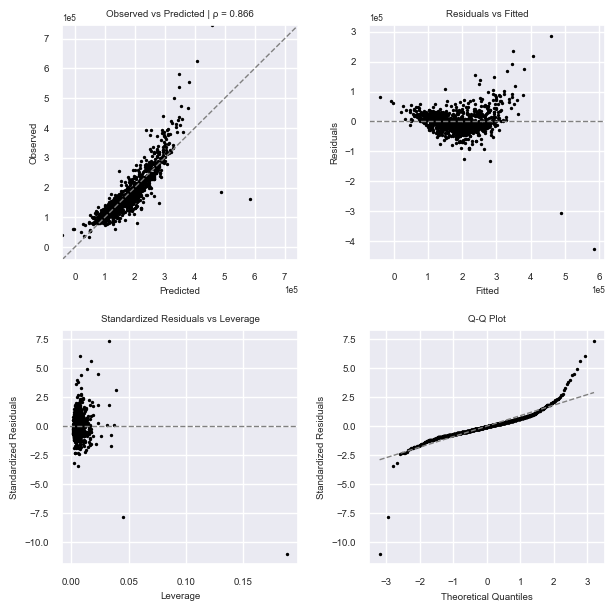

In [8]:
report.train_report().plot_diagnostics()

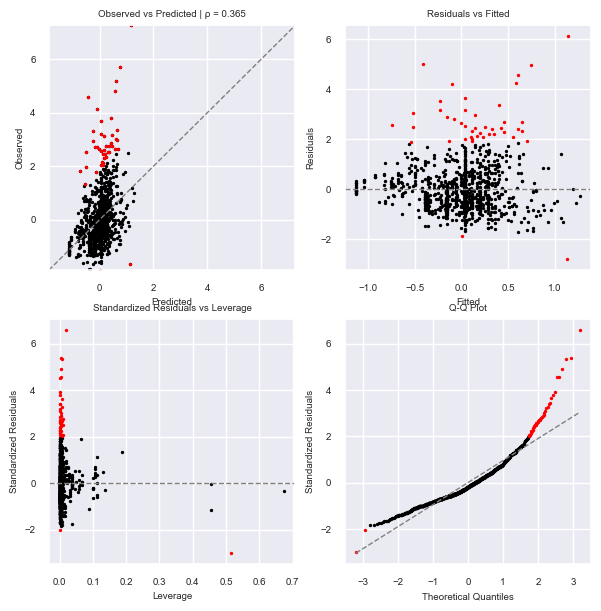

In [13]:
report.train_report().plot_diagnostics(show_outliers=True)

In [21]:
report.fit_statistics()

,OrdinaryLeastSquares_test
Statistic,
rmse,1.713944
mad,1.090618
pearsonr,-0.141117
spearmanr,-0.343832
r2,-1.533671
adjr2,-1.580919
n,438


In [22]:
report.statsmodels_summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     31.88
Date:                Wed, 22 May 2024   Prob (F-statistic):           7.28e-45
Time:                        01:18:11   Log-Likelihood:                -1376.9
No. Observations:                1022   AIC:                             2772.
Df Residuals:                    1013   BIC:                             2816.
Df Model:                           8                                         
Covariance Type:                  HC3                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.0039      0.038      0.101      0.920      -0.071       0.079
poly(LotFrontage,2)1:MSZoning_FV   -27.8010     20.512     -1.355      0.175     -68.004      12.402
poly(LotFrontage,2)1:MSZoning_RH    82.1613     19.130      4.295      0.000      44.667     119.656
poly(LotFrontage,2)1:MSZoning_RL    10.2589      1.771      5.793      0.000       6.788      13.730
poly(LotFrontage,2)1:MSZoning_RM    10.7934     23.663      0.456      0.648     -35.585      57.172
poly(LotFrontage,2)2:MSZoning_FV   -39.3031     20.999     -1.872      0.061     -80.460       1.854
poly(LotFrontage,2)2:MSZoning_RH   103.2918     27.575      3.746      0.000      49.247     157.337
poly(LotFrontage,2)2:MSZoning_RL    -4.5159      1.509     -2.992      0.003      -7.474      -1.558
poly(LotFrontage,2)2:MSZoning_RM    -6.0054     26.089     -0.230      0.818     -57.139      45.128
==============================================================================
Omnibus:                      356.684   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1520.266
Skew:                           1.600   Prob(JB):                         0.00
Kurtosis:                       8.046   Cond. No.                     1.73e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 1.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
report = tm.ml_classification(
    models=[
        LinearC(type='no_penalty'),
        LinearC(type='l2'),
        # LinearC(type='elasticnet')
    ],
    outer_cv=3,
    y_var='LotConfig',
    X_vars=['LotArea', 'LotFrontage', 'MSSubClass', 'MSZoning', 'SalePrice']
)

INFO: Fitting model LinearC(no_penalty). 
INFO: Fitted model LinearC(no_penalty). 
INFO: Fitting model LinearC(l2). 
INFO: Fitted model LinearC(l2). 


In [15]:
report.cv_fit_statistics()

LinearC(no_penalty)_train_cv LinearC(l2)_train_cv
Fold Statistic                                                     
0    accuracy                          0.71261             0.695015
     f1                               0.381128             0.820069
     precision                        0.764434             0.695015
     recall                            0.29182                 0.25
     roc_auc(ovo)                          NaN                  NaN
     n                                     341                  341
1    accuracy                         0.697947             0.703812
     f1                               0.354947             0.350717
     precision                        0.526496             0.602736
     recall                           0.223111             0.222517
     roc_auc(ovo)                     0.679837             0.541851
     n                                     341                  341
2    accuracy                         0.679412             0.694118
     f1                               0.364649              0.42328
     precision                        0.350024              0.39911
     recall                           0.228155             0.201855
     roc_auc(ovo)                     0.703558             0.589152
     n                                     340                  340

In [ ]:
tm.datahandler().load_data_checkpoint('finished preprocessing')
report = tm.ml_regression(
    models=[
        LinearR(type='ols'),
        LinearR(type='l2'), 
        # RobustLinearR(type='huber'),
        # RobustLinearR(type='ransac'),
        # SVMR(type='linear'),
        # MLPR(),
        # TreeEnsembleR(type='adaboost'),
    ],
    y_var='SalePrice',
    X_vars=['LotFrontage', 'LotArea', 'SaleCondition'], 
    outer_cv=5
)

In [12]:
report.model_report('LinearC(no_penalty)').train_report().fit_statistics_by_class()

LinearC(no_penalty)_train_cv
Class Statistic                                
N     accuracy                         0.922724
      f1                               0.269369
      n                              340.666667
      precision                        0.459524
      recall                           0.192524
      roc_auc(ovr)                          NaN
Y     accuracy                         0.922724
      f1                               0.959177
      n                              340.666667
      precision                        0.938372
      recall                           0.980945
      roc_auc(ovr)                          NaN

INFO: Working datasets reset to checkpoint "finished preprocessing". Shapes of 
      train, test datasets: (1022, 75), (438, 75). 
INFO: Fitting model LinearR(ols). 


AttributeError: 'NoneType' object has no attribute 'yscaler'

In [11]:
report.fit_statistics('test')

,LinearR(ols)_test,LinearR(l2)_test
Statistic,,
rmse,74670.363952,77954.8306
mad,53961.798436,56099.668066
pearsonr,0.560246,0.545872
spearmanr,0.551487,0.512808
r2,0.287703,0.223662
adjr2,0.273891,0.208608
n,369,369


In [12]:
report.cv_fit_statistics()

LinearR(ols)_train_cv LinearR(l2)_train_cv
Fold Statistic                                           
0    rmse               69356.922969         72625.540853
     mad                53337.449091          55124.88749
     pearsonr               0.554651             0.529028
     spearmanr              0.548352             0.489434
     r2                     0.292174             0.223886
     adjr2                  0.260615             0.189282
     n                           165                  165
1    rmse               58541.905102         58473.305728
     mad                46850.069462         47293.599225
     pearsonr               0.366188             0.368325
     spearmanr               0.38439             0.342091
     r2                     0.102502             0.104604
     adjr2                   0.06348             0.065674
     n                           169                  169
2    rmse               76217.610804         76158.707089
     mad                50719.769757         53259.036067
     pearsonr               0.420595             0.363179
     spearmanr              0.512243             0.459869
     r2                     0.106634             0.108015
     adjr2                  0.067792             0.069233
     n                           169                  169
3    rmse                94067.70365         91139.256022
     mad                51669.876383         51448.957455
     pearsonr                0.42653             0.423618
     spearmanr              0.623181             0.624069
     r2                    -0.594623            -0.496883
     adjr2                  -0.66806            -0.565819
     n                           160                  160
4    rmse               86321.067721         88696.941178
     mad                58881.732617         60033.405235
     pearsonr               0.534947             0.597697
     spearmanr              0.594599             0.605766
     r2                     0.232509             0.189679
     adjr2                  0.199139             0.154447
     n                           169                  169

In [13]:
report['LinearR(ols)'].test_report().fit_statistics()

,LinearR(ols)_test
Statistic,
rmse,74670.363952
mad,53961.798436
pearsonr,0.560246
spearmanr,0.551487
r2,0.287703
adjr2,0.273891
n,369


In [14]:
report['LinearR(ols)'].train_report().cv_fit_statistics()

LinearR(ols)_train_cv
Fold Statistic                      
0    rmse               69356.922969
     mad                53337.449091
     pearsonr               0.554651
     spearmanr              0.548352
     r2                     0.292174
     adjr2                  0.260615
     n                           165
1    rmse               58541.905102
     mad                46850.069462
     pearsonr               0.366188
     spearmanr               0.38439
     r2                     0.102502
     adjr2                   0.06348
     n                           169
2    rmse               76217.610804
     mad                50719.769757
     pearsonr               0.420595
     spearmanr              0.512243
     r2                     0.106634
     adjr2                  0.067792
     n                           169
3    rmse                94067.70365
     mad                51669.876383
     pearsonr                0.42653
     spearmanr              0.623181
     r2                    -0.594623
     adjr2                  -0.66806
     n                           160
4    rmse               86321.067721
     mad                58881.732617
     pearsonr               0.534947
     spearmanr              0.594599
     r2                     0.232509
     adjr2                  0.199139
     n                           169